

Calculation of Invariant Functions and Classification Based on Their Values



**Moment Functions**


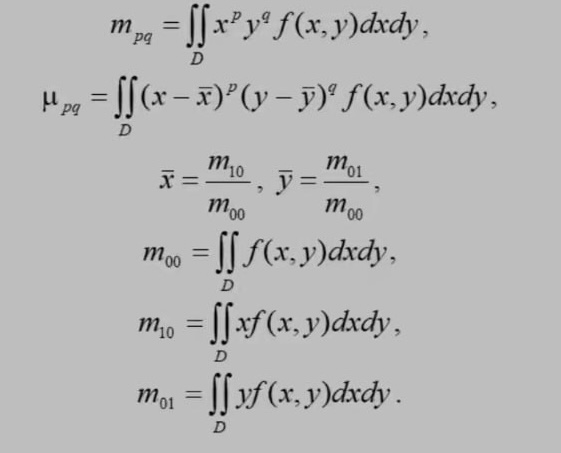



**Discrete Image**




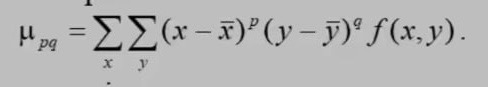



**Invariant Moments with Respect to Translation, Rotation, and Scaling of an Image**


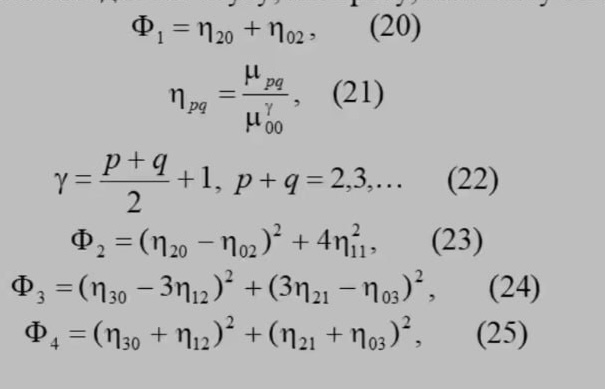

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

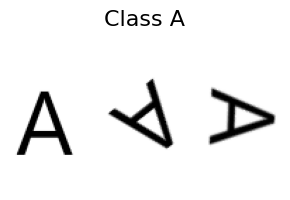

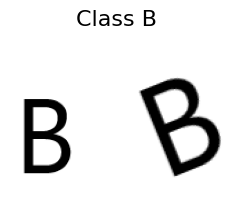

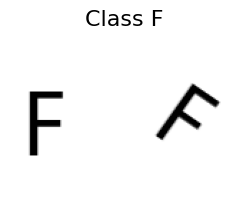

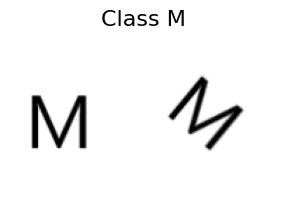

In [ ]:
def plot_A(arr_list, title):
    plt.figure(figsize=(3, 2))
    plt.suptitle(title, fontsize=16)
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(arr_list[i], cmap='gray')
        plt.title('')
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def plot_others(arr_list, title):
    plt.figure(figsize=(3, 2))
    plt.suptitle(title, fontsize=16)
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.imshow(arr_list[i], cmap='gray')
        plt.title('')
        plt.axis("off")
    plt.tight_layout()
    plt.show()

names = ['a', 'a1', 'a2', 'b', 'b1', 'f', 'f1', 'm', 'm1']
images = [plt.imread(f'/content/drive/MyDrive/Lab_3/{name}.bmp') for name in names]

plot_A(images, 'Class A')
plot_others(images[3:], 'Class B')
plot_others(images[5:], 'Class F')
plot_others(images[7:], 'Class M')

In [ ]:
def invariate_function(image):
  grey_image = np.mean(image, axis=2)

  x = np.arange(grey_image.shape[1])
  y = np.arange(grey_image.shape[0])[:, np.newaxis]

  m00 = np.sum(grey_image)
  m01 = np.sum(grey_image*y)
  m10 = np.sum(grey_image*x)

  x_ = m10 / m00
  y_ = m01 / m00

  x_diff = x - x_
  y_diff = y - y_

  mu00 = m00
  mu11 = np.sum(x_diff * y_diff * grey_image)
  mu12 = np.sum(x_diff * (y_diff**2) * grey_image)
  mu21 = np.sum((x_diff**2) * y_diff * grey_image)
  mu20 = np.sum((x_diff**2)  * grey_image)
  mu02 = np.sum((y_diff**2) * grey_image)
  mu30 = np.sum((x_diff**3)  * grey_image)
  mu03 = np.sum((y_diff**3) * grey_image)

  nu11 = mu11 / mu00**2
  nu12 = mu12 / mu00**2.5
  nu21 = mu21 / mu00**2.5
  nu20 = mu20 / mu00**2
  nu02 = mu02 / mu00**2
  nu30 = mu30 / mu00**2.5
  nu03 = mu03 / mu00**2.5


  f1 = nu20 + nu02
  f2 = (nu20 - nu02)**2 + 4*nu11**2
  f3 = (nu30 - 3*nu12)**2 + (3*nu21 - nu03)**2
  f4 = (nu30 + nu12)**2 + (nu21 + nu03)**2

  return f1, f2, f3, f4


In [ ]:
inv_f = [invariate_function(img) for img in images]

for name, invf in zip(names, inv_f):
    print(name, invf)


a (0.0008961980641907847, 1.908201527235943e-07, 5.410898119812452e-13, 3.626377518840867e-13)
a1 (0.000898452255263166, 1.9318752077765867e-07, 5.864579855027436e-14, 2.926288056546171e-13)
a2 (0.0009002807976390632, 1.9840051638475897e-07, 2.5636949186194774e-13, 4.2958941236689844e-13)
b (0.0010385980717081778, 2.97906712601779e-07, 5.0849792392482e-12, 1.0701585111379281e-11)
b1 (0.001018245385611099, 1.378198857553208e-07, 4.3391636031261483e-13, 7.573324900480026e-13)
f (0.0008051953102151365, 1.0855783568126902e-07, 2.7248315983621703e-13, 5.857922995137797e-13)
f1 (0.0008046873504038478, 1.0827179749391689e-07, 3.982117655690055e-13, 1.0228063754258985e-12)
m (0.0007432439267953367, 4.051434143616764e-09, 3.781213939561346e-14, 3.0376142231362976e-13)
m1 (0.0007427649039333855, 3.259155140177009e-09, 1.6512729478892267e-14, 3.2662691445870404e-13)


In [ ]:
"""
def euclidean_distance(c1, c2):
  return math.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2 + (c1[2] - c2[2])**2 + (c1[3] - c2[3])**2)

def classification(test_param, classes, names_cl, name_test):
  l = []
  r = [0, 3, 5, 7]
  for i in r:
    dist = euclidean_distance(test_param, classes[i])
    l.append(dist)
  res = min(l)
  idx = l.index(res)
  return f'{name_test} belongs to {names_cl[idx]} class.'
"""


In [ ]:
def euclidean_distance(c1, c2):
  return math.sqrt((c1[0] - c2[0])**2)

def classification(test_param, classes, names_cl, name_test):
  l = []
  r = [0, 3, 5, 7]
  for i in r:
    dist = euclidean_distance(test_param, classes[i])
    l.append(dist)
  res = min(l)
  idx = l.index(res)
  return f'{name_test} belongs to {names_cl[idx]} class.'


In [ ]:
names_cl = ['a', 'b', 'f', 'm']
r = [1, 2, 4, 6, 8]
for i in r:
  print(classification(inv_f[i], inv_f, names_cl, names[i]))

a1 belongs to a class.
a2 belongs to a class.
b1 belongs to b class.
f1 belongs to f class.
m1 belongs to m class.


In [ ]:
"""
def plot_3d_points(points, labels, x_label, y_label, z_label, x_axis, y_axis, z_axis):
    trace = go.Scatter3d(
        x=points[:, x_axis],
        y=points[:, y_axis],
        z=points[:, z_axis],
        mode='markers+text',
        marker=dict(
            size=8,
            color='rgb(255,0,0)',
            opacity=0.8
        ),
        text=labels,
        textposition="bottom center"
    )

    fig = go.Figure(data=[trace])
    fig.update_layout(
        scene=dict(
            xaxis=dict(title=x_label),
            yaxis=dict(title=y_label),
            zaxis=dict(title=z_label),
            aspectmode='cube',
            camera=dict(
                eye=dict(x=1.25, y=1.25, z=1.25)
            )
        )
    )
    fig.show()

inv_p = np.array(inv_f)
f = ['F1',' F2', 'F3', 'F4']
plot_3d_points(inv_p, names, f[0], f[1], f[3], 0, 1, 3)
"""

In [ ]:
"""
def scatter_plot_with_labels_xy(points, labels):
    plt.figure(figsize=(8, 6))
    for i, point in enumerate(points):
        plt.scatter(point[0], point[1], label=labels[i])

    plt.xlabel('X Label')
    plt.ylabel('Y Label')

    plt.legend()
    plt.show()


inv_p = np.array(inv_f)
scatter_plot_with_labels_xy(inv_p[:3], names[:3])
scatter_plot_with_labels_xy(inv_p[3:5], names[3:5])
scatter_plot_with_labels_xy(inv_p[5:7], names[5:7])
scatter_plot_with_labels_xy(inv_p[7:], names[7:])
"""

"\ndef scatter_plot_with_labels_xy(points, labels):\n    plt.figure(figsize=(8, 6))\n    for i, point in enumerate(points):\n        plt.scatter(point[0], point[1], label=labels[i])\n\n    plt.xlabel('X Label')\n    plt.ylabel('Y Label')\n\n    plt.legend()\n    plt.show()\n\n\ninv_p = np.array(inv_f)\nscatter_plot_with_labels_xy(inv_p[:3], names[:3])\nscatter_plot_with_labels_xy(inv_p[3:5], names[3:5])\nscatter_plot_with_labels_xy(inv_p[5:7], names[5:7])\nscatter_plot_with_labels_xy(inv_p[7:], names[7:])\n"